In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import os
import folium
import json
import matplotlib.pyplot as plt

In [2]:
!pip install folium

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import os
import folium
import json

In [4]:
country_geo = r"C:\Users\gkgiz\Desktop\CF\Achievement 6\us-states.json"

In [6]:
# This command propts matplotlib visuals to appear in the notebook 

%matplotlib inline

In [7]:
path = r'C:\Users\gkgiz\Desktop\CF\Achievement 6'

In [8]:
df = pd.read_csv(os.path.join(path, 'absenteeism_data_cleaned.csv'))

I am replacing all the values under StoreLocation with random states in the US, since I was not able to find a geojson file to include the cities in British Columbia, which is the province given originally in the data set. Additionally, I am also dropping the "City" column, since I don't want two geographical variable in the data set, one referring to U.S, one to Canada.

In [9]:
new_values = [
    'Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
    'Colorado', 'Connecticut', 'Delaware', 'Florida', 'Georgia',
    'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa',
    'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
    'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri',
    'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey',
    'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio',
    'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina',
    'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont',
    'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming'
]

df['StoreLocation'] = np.random.choice(new_values, size=len(df), replace=True)

# Display the modified DataFrame
print(df)

     Gender             City      JobTitle    DepartmentName StoreLocation  \
0         F          Burnaby         Baker            Bakery      Colorado   
1         M        Courtenay         Baker            Bakery        Hawaii   
2         M         Richmond         Baker            Bakery       Montana   
3         F         Victoria         Baker            Bakery     Louisiana   
4         M  New Westminster         Baker            Bakery       Florida   
...     ...              ...           ...               ...           ...   
8251      F          Langley       Cashier  Customer Service   Connecticut   
8252      M          Montney       Cashier  Customer Service         Maine   
8253      F   West Vancouver       Cashier  Customer Service       Georgia   
8254      F        Vancouver  Dairy Person             Dairy      Colorado   
8255      M        Vancouver  Dairy Person             Dairy     Louisiana   

     Division        Age  LengthService  AbsentHours BusinessUn

In [10]:
df = df.drop('City', axis=1)

In [11]:
df.head()

,Gender,JobTitle,DepartmentName,StoreLocation,Division,Age,LengthService,AbsentHours,BusinessUnit
0,F,Baker,Bakery,Colorado,Stores,32.028816,6.018478,36.577306,Stores
1,M,Baker,Bakery,Hawaii,Stores,40.320902,5.532445,30.165072,Stores
2,M,Baker,Bakery,Montana,Stores,48.822047,4.389973,83.807798,Stores
3,F,Baker,Bakery,Louisiana,Stores,44.599357,3.081736,70.020165,Stores
4,M,Baker,Bakery,Florida,Stores,35.697876,3.619091,0.000000,Stores


In [12]:
# Check for missing values

df.isnull().sum()

Gender            0
JobTitle          0
DepartmentName    0
StoreLocation     0
Division          0
Age               0
LengthService     0
AbsentHours       0
BusinessUnit      0
dtype: int64

In [13]:
dups = df.duplicated()

In [14]:
dups.shape

(8256,)

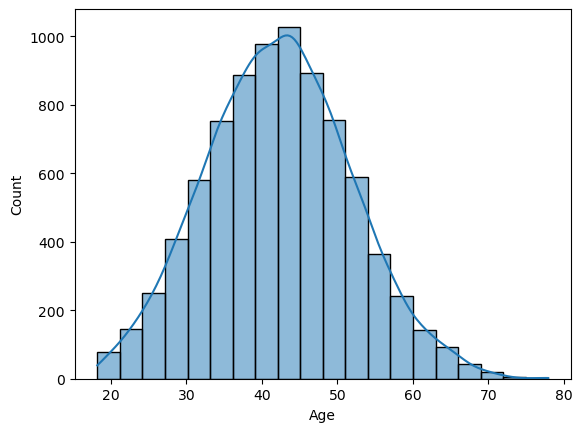

In [15]:
sns.histplot(df['Age'], bins=20, kde = True) # shows extreme values for 'age'
plt.show()

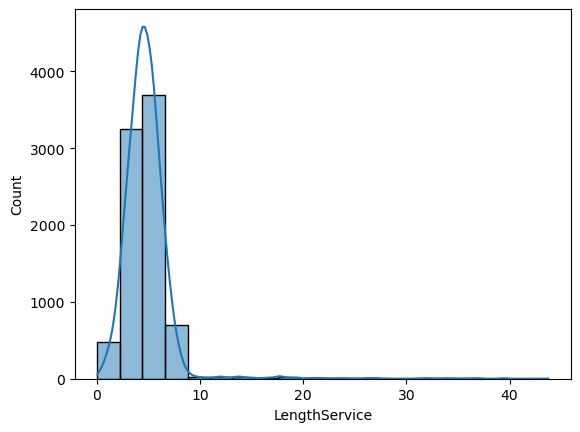

In [16]:
sns.histplot(df['LengthService'], bins=20, kde = True) # shows extreme values for 'length of service'
plt.show()

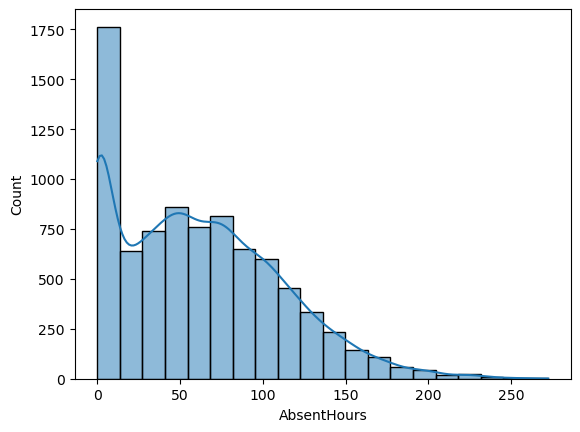

In [17]:
sns.histplot(df['AbsentHours'], bins=20, kde = True) # shows extreme values for 'Absent Hours'
plt.show()

In [18]:
df_2= df[df['AbsentHours'] >= 1]

In [19]:
df_2.shape

(6983, 9)

In [20]:
df.shape

(8256, 9)

I realize that there are 1273 rows where the absent hours is 0. I tend to remove these rows because there is no way of knowing if these actually represent the correct absence numbers or point out to a data collection mistake. However, they make up for quite a bit of total rows and I want to make an informed decision to address the 0 values and to investigate the given values further. I asked for ChatGPT's help here to do the investigation and it came up with the following code.

Percentage of zero absent hours by department:
 DepartmentName
Customer Service          19.354839
Meats                     19.032258
Bakery                    17.661290
Dairy                     16.532258
Produce                   14.032258
Processed Foods            8.548387
Accounts Receiveable       0.645161
Store Management           0.564516
HR Technology              0.403226
Investment                 0.403226
Accounting                 0.403226
Accounts Payable           0.403226
Compensation               0.322581
Audit                      0.322581
Labor Relations            0.322581
Recruitment                0.241935
Information Technology     0.241935
Training                   0.241935
Executive                  0.241935
Employee Records           0.080645
Name: proportion, dtype: float64

Percentage of zero absent hours by store location:
 StoreLocation
Kansas            2.983871
Arkansas          2.822581
Utah              2.741935
Idaho             2.661290
Oklahoma 

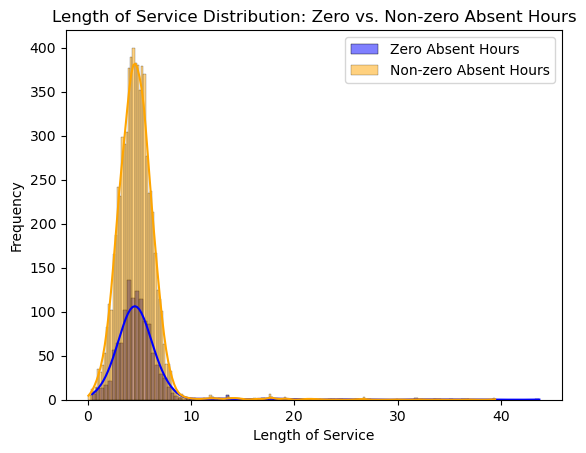

In [22]:

# Step 1: Filter the data for zero absent hours
zero_absent_hours = df[df['AbsentHours'] == 0]

# Step 2: Analyze patterns across departments and job roles
# Group by department
department_counts = zero_absent_hours['DepartmentName'].value_counts(normalize=True) * 100
print("Percentage of zero absent hours by department:\n", department_counts)

# Group by store location
location_counts = zero_absent_hours['StoreLocation'].value_counts(normalize=True) * 100
print("\nPercentage of zero absent hours by store location:\n", location_counts)

# Step 3: Explore correlation with 'length_of_service'
# Compare the distribution of 'length_of_service' for employees with zero vs. non-zero absent hours

# Plot distribution
sns.histplot(df[df['AbsentHours'] == 0]['LengthService'], label='Zero Absent Hours', color='blue', kde=True)
sns.histplot(df[df['AbsentHours'] > 0]['LengthService'], label='Non-zero Absent Hours', color='orange', kde=True)

plt.legend()
plt.title('Length of Service Distribution: Zero vs. Non-zero Absent Hours')
plt.xlabel('Length of Service')
plt.ylabel('Frequency')
plt.show()

The patterns observed suggest that a data recording issue is likely. The disproportionately high percentages of zero absent hours in customer-facing roles, coupled with much lower percentages in corporate departments, indicate that zeros might not represent true values but rather inconsistencies in data entry. Therefore I am dropping of all these rows where the absent hours is 0.

In [24]:
df_2.head()

,Gender,JobTitle,DepartmentName,StoreLocation,Division,Age,LengthService,AbsentHours,BusinessUnit
0,F,Baker,Bakery,Colorado,Stores,32.028816,6.018478,36.577306,Stores
1,M,Baker,Bakery,Hawaii,Stores,40.320902,5.532445,30.165072,Stores
2,M,Baker,Bakery,Montana,Stores,48.822047,4.389973,83.807798,Stores
3,F,Baker,Bakery,Louisiana,Stores,44.599357,3.081736,70.020165,Stores
5,M,Baker,Bakery,Georgia,Stores,48.440311,2.717692,81.830079,Stores


In [25]:
data_to_plot = df_2[['StoreLocation','AbsentHours']]

In [26]:
map = folium.Map(location=[53.7267, -127.6476], zoom_start=6)

# Add the choropleth layer to the map
folium.Choropleth(
    geo_data=country_geo,
    data=data_to_plot,
    columns=['StoreLocation', 'AbsentHours'],  # Columns to bind to the map
    key_on='feature.properties.name',  # Match the city names from GeoJSON
    fill_color='YlOrBr',  # Color scale for the choropleth
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Absent Hours'
).add_to(map)

# Display the map
map

In [52]:
map.save('plot_data.html')

## How do absenteeism rates vary across different store locations? Are certain locations facing more challenges with absenteeism?

The map above could help us answer this question. The absenteeism rate varies across different store locations, and across the country, with no visible trend dictating it. Illinois is the state where the absenteeism rate is at its highest, followed by Atlanta, Tenneessee and New Hempshire. Among the states with the lowest absenteeism rate are Oregon, Wyoming and Phoenix.

It would be great if we could also see the numerical values from this analysis. Otherwise the interpretation is missing, since we don't know if Illinois is by far the most "absent" state or if the difference is actually not that striking.